In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
data = pd.read_csv(r"C:\Users\DeLL\Documents\ML_internship_Projects\Customer Churn Prediction\Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Dataset Shape:", data.shape)
print("\nColumn Names:\n", data.columns)
print("\nMissing Values:\n", data.isnull().sum())


Dataset Shape: (10000, 14)

Column Names:
 Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Exited
0    7963
1    2037
Name: count, dtype: int64


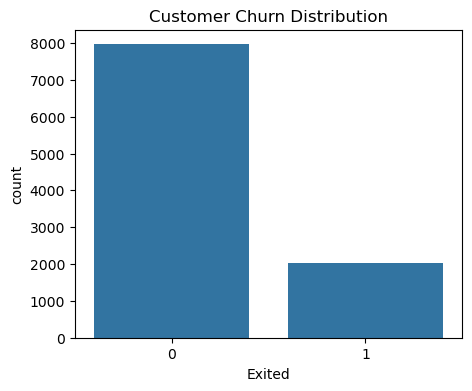

In [5]:
print(data['Exited'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='Exited', data=data)
plt.title("Customer Churn Distribution")
plt.show()


In [6]:
data.drop(
    columns=['RowNumber', 'CustomerId', 'Surname'],
    inplace=True
)


In [7]:
data = pd.get_dummies(data, drop_first=True)
print("Shape after encoding:", data.shape)


Shape after encoding: (10000, 12)


In [8]:
scaler = StandardScaler()

numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [9]:
X = data.drop('Exited', axis=1)
y = data['Exited']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [11]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

print("Logistic Regression Results\n")
print(classification_report(y_test, log_preds))


Logistic Regression Results

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1991
           1       0.60      0.19      0.29       509

    accuracy                           0.81      2500
   macro avg       0.71      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500



In [12]:
rf_model = RandomForestClassifier(
    n_estimators=120,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Results\n")
print(classification_report(y_test, rf_preds))


Random Forest Results

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1991
           1       0.85      0.42      0.56       509

    accuracy                           0.87      2500
   macro avg       0.86      0.70      0.74      2500
weighted avg       0.87      0.87      0.85      2500



In [13]:
gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.08,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

print("Gradient Boosting Results\n")
print(classification_report(y_test, gb_preds))


Gradient Boosting Results

              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1991
           1       0.80      0.51      0.62       509

    accuracy                           0.87      2500
   macro avg       0.84      0.74      0.77      2500
weighted avg       0.87      0.87      0.86      2500



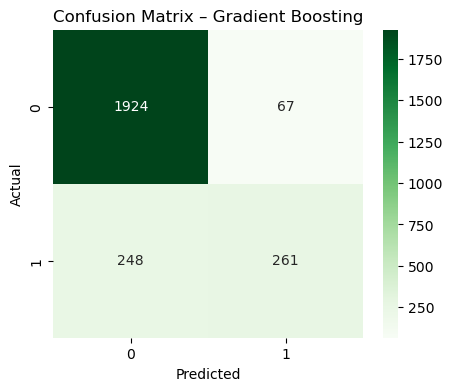

In [14]:
cm = confusion_matrix(y_test, gb_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Gradient Boosting")
plt.show()


In [15]:
log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
gb_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:,1])

print("ROC–AUC Scores")
print("Logistic Regression:", log_auc)
print("Random Forest:", rf_auc)
print("Gradient Boosting:", gb_auc)


ROC–AUC Scores
Logistic Regression: 0.7836472377170746
Random Forest: 0.8745435007632579
Gradient Boosting: 0.8776725125540373


In [16]:
sample_customer = X_test.iloc[[0]]
prediction = gb_model.predict(sample_customer)

if prediction[0] == 1:
    print("Customer is likely to churn")
else:
    print("Customer is likely to stay")


Customer is likely to stay
